## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these.

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# read in dataset
df = pd.read_csv('ab_data.csv')

In [3]:
# let's have a look at the first five rows of the dataframe
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
# number of rows in dataset
df_n_rows = df.shape[0]
df_n_rows

294478

c. The number of unique users in the dataset.

In [5]:
# unique users in dataset
unique_users = df['user_id'].nunique()
unique_users

290584

d. The proportion of users converted.

In [6]:
# proportion of users converted
df[df['converted']==1]['user_id'].count() / df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
# number of times treatment didn't with new_page
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False]['user_id'].count()

3893

f. Do any of the rows have missing values?

In [8]:
# requested more info to determine if rows missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


** Comment: According to info above, dataset doesn't have any missing values **

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# assign all of df to df2
df2 = df
# determine index of rows where treatment doesn't lined up with new_page
drop_rows = df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].index.values

In [10]:
# drop rows from df2
df2.drop(drop_rows,inplace=True)

In [11]:
# Checking that all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
# checking that there is indeed one duplicate
sum(df2['user_id'].duplicated())

1

In [14]:
# finding the duplicated value
duplicate_bool = df2.duplicated(subset=['user_id'], keep='first')
# locating the duplicate row in dataframe df2
df2_duplicated_row = df2.loc[duplicate_bool == True]
df2_duplicated_row

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [15]:
# row information for the repeat user_id
df2_duplicated_row

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
# dropping the duplicate and keeping dataframe df2
dupl_row = df2_duplicated_row.index.values # retrieving index of duplicated row
df2.drop(dupl_row,inplace=True) # dropping duplicated row from df2

In [17]:
# checking that the duplicate has been removed - this should 0
sum(df2['user_id'].duplicated())

0

In [18]:
# checking number of rows in dataframe df2
df2.shape[0]

290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
# probability of an individual converting regardless of the page they receive
obs_diff = df2[df2['converted']==1]['user_id'].count() / df2.shape[0]
obs_diff

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
# Given that an individual was in the control group, what is the probability they converted
obs_diff_control = df2.query('group == "control"').query('converted == 1')['user_id'].count() / df2.query('group == "control"')['user_id'].count()
obs_diff_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
# Given that an individual was in the treatment group, what is the probability they converted
obs_diff_treatment = df2.query('group == "treatment"').query('converted == 1')['user_id'].count() / df2.query('group == "treatment"')['user_id'].count()
obs_diff_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [22]:
# Given that an individual was in the control group, what is the probability they converted
obs_diff_newpage = df2.query('landing_page == "new_page"')['user_id'].count() / df2.shape[0]
obs_diff_newpage

0.50006194422266881

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**In summary, our analysis used a dataset featuring 290,584 rows.
50% of the participants were provided with the new page (i.e. the treatment group), and the other 50% kept the old page (i.e. the control group).
In the control group, the data showed a conversion rate of only 12%. In the treatment group (exposed to the new page), a  lower conversion rate was recorded at 11.88%. **

** These results are not encouraging for the conversion rate of the new page. However, such A/B testing can produce bias results when tested due to factors like change aversion, whereby existing users may give an unfair advantage to the old version. **

** Hence, it is my recommendation to gather more data for a longer period of time to reduce the likelihood of change aversion bias in our data. **

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

** H0 = Old page is better than New page <br>
p(new) - p(old) <= 0 ** <br>

** H1 = New page is better than Old page <br>
p(new) - p(old) > 0** <br>

** with type I error rate alpha = 0.05 **

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br>
Use a sample size for each page equal to the ones in **ab_data.csv**.  <br>
Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br>
Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [23]:
# proportion of users converted
p_new = df2[df2['converted']==1]['user_id'].count() / df2.shape[0]
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [24]:
# proportion of users converted
p_old = df2[df2['converted']==1]['user_id'].count() / df2.shape[0]
p_old

0.11959708724499628

c. What is $n_{new}$?

In [25]:
n_new = df2[df2['group']=='treatment']['user_id'].count()
n_new

145310

d. What is $n_{old}$?

In [26]:
n_old = df2[df2['group']=='control']['user_id'].count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [41]:
new_page_converted = np.random.normal(0, p_new, n_new)

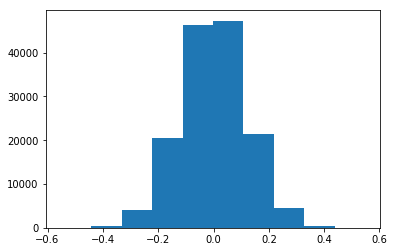

In [42]:
plt.hist(new_page_converted);

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [43]:
old_page_converted = np.random.normal(0, p_old, n_old)

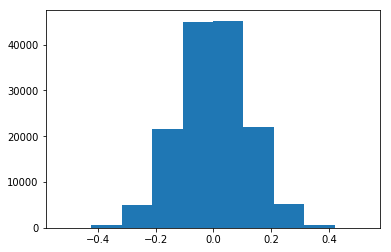

In [44]:
plt.hist(old_page_converted);

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [31]:
new_page_converted.mean() - old_page_converted.mean()

-0.00060666256937536944

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [32]:
# sampling distribution with boostrapping
np.random.seed(42)
p_diffs = np.array([])
for i in range(int(1e4)):
    new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
    old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
    d_diffs = new_converted_simulation - old_converted_simulation
    p_diffs = np.append(p_diffs,d_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

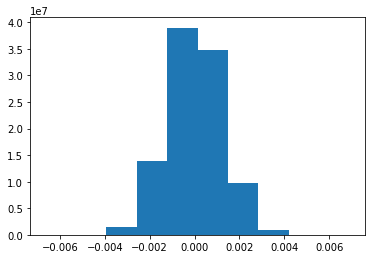

In [33]:
# plot sampling distribution
plt.hist(p_diffs);

** Comment: We get a normal distribution which is what we expected from bootstrapping. ** <br>

** By bootstrapping and then calculating repeated values of our statistics, we can gain an understanding of the sampling distribution of our statistics - which will allow us to calculate confidence intervals and/or p-values of interest.**

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [100]:
(p_diffs > (obs_diff_treatment - obs_diff_control)).mean()

0.90503851000000002

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**We get a p-value of 0.905. Hence, the observed difference in our dataset is only higher than ~10% of the simulated difference assuming both pages are the same. Not Significant.**

**By comparing our p-value to our type I error threshold (α), we can make our decision about whether "fail to reject the null" or "reject the null" based on our hypothesis test.Since the p-value is greater than our error rate of 0.05, we fail to reject the null hypothesis, which is fail to reject the hypothesis that the conversion for the old page is equal to the conversion rate for the new page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [101]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

convert_old = df2.query('group == "control"').query('converted == 1')['user_id'].count()
convert_new = df2.query('group == "treatment"').query('converted == 1')['user_id'].count()
n_old = df2[df2['group']=='control']['user_id'].count()
n_new = df2[df2['group']=='treatment']['user_id'].count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [102]:
z_sc, p_val = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], value=0.0, alternative='larger')
z_sc, p_val

(1.3109241984234394, 0.094941687240975514)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The z-score is: 1.31, while the p_value is: 0.095. They do not match the findings in parts j. & k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**In this project, the outcome variable, although represented numerically as a binary variable, is a classification. Therefore, the proper regression model we must use is the Logistic Regression Model.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [68]:
df2['intercept'] = 1 # adding intercept column
dummy = pd.get_dummies(df2['group'],drop_first=True) ## creating dummy
dummy['ab_page'] = dummy['treatment'] 
df2 = df2.join(dummy['ab_page']) # joining dummy column to dataframe

In [69]:
df2.head() # checking dataframe for ab_page column

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [70]:
# baseline: control group
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
logit_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [71]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Jan 2018   Pseudo R-squ.:               8.077e-06
Time:                        12:31:12   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value, which is 0.190, is different because in the linear regression model, the alternative is whether p_new and p_old are not equal; whereas in the previous part the alternative hypothesis was that p_new - p_old > 0**

** Hence, we should expect to get different p-values as these are different hypothesis tests.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Adding more terms to our model may add more input to our model but we must be careful to account for potential dependencies between the variables in our model.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [72]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [73]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [74]:
### Create the necessary dummy variables
country_dummy = pd.get_dummies(df_new['country']) ## creating dummy
df_new = df_new.join(country_dummy) # joining dummy column to dataframe

In [75]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [76]:
logit_mod2 = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','CA','UK']]) # baselines: control; US
res2 = logit_mod2.fit()
res2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 10 Jan 2018   Pseudo R-squ.:               2.323e-05
Time:                        12:31:35   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

Comment: ** p_values for ab_page, CA, and US are greater than 0.05 indicating that they may not be statistically significant to determine the proportion of conversion.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [77]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# get y and X dataframes based on this regression:
y, X = dmatrices('converted ~ intercept + ab_page + UK + CA', df_new, return_type='dataframe')
# generate VID
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

/Users/hamzabendemra/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1386: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF Factor,features
0,0.000000,Intercept
1,0.000000,intercept
2,1.000006,ab_page
3,1.017761,UK
4,1.017759,CA


Comment: ** There is some multi-collinearity between countries and page as shown by non-zero values for VIF but we may decide to consider it negligible since the VIF values are less than 5. **

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.